In [1]:
%run "../../shared/utilz_image_proc.ipynb"

In [2]:
import matplotlib.animation as animation

## inline video for IPython
from IPython.display import Video
from IPython.display import HTML


##

In [3]:
# def plot_animation( framez ):
#     fig = plt.figure() 
#     imgz = []
#     for i in range( len(framez)):
#         imgz.append( plt.imshow(framez[i], animated=True) )
        
#     ani = animation.ArtistAnimation(fig, imgz, 
#                                     interval=50, blit=True, repeat_delay=1000 )
    
#     plt.show();
    
    
# def plot_cv2animation(capture):
#     success = True
#     framez = []
#     while success:
#         success, img = capture.read() 
#         if success:
#             framez.append( img  )    
# #     print( f"Count framez = {len(framez)}")
# #     print( f"First Object = {framez[0].shape}")    
# #     print( f"First Object = {type(framez[0] ) }")
# #     plot_image( framez[0])
    
#     plot_animation( framez )
    
    
# def html_video( src_path ):
#     return HTML(f"""
#         <video alt="test" controls>
#             <source src="{src_path}" type="video/mp4">
#         </video>
#         """)

In [4]:
## CV2 imshow bila crashing
# Crashing happens b/c jupyter expects control back after a command block execution and cv2.imshow is using a wait callback. 
# So, solution is to explicitly close the window once done 
# Don't click the red/exit cross. Instead, tap on any key 

def plot_cv2Image(img, title='Image View'):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

def plot_cv2Video(capture, title='Video View'):
    while capture.isOpened(): ## go frame by frame
        success, img = capture.read()
        if success:
            cv2.imshow( title, img)
        if cv2.waitKey(30) & 0xFF == 27: ##ESC  # 1 == ord('q'):
            break
    
    cv2.destroyAllWindows()    
    capture.release()

# Open CV and Image Processing
**libraries**
- `open cv2`


## 1. Reading Images, Videos and Webcam

`cv2.imread`
- Local file path: `cv2.imread( file_path_local )`
- Video capture: `cv2.VideoCapture( file_path_local )`
- Webcam capture: `cv2.VideoCapture( cam_id_number )` zero to use default webcam and then define params for the capture object




In [5]:
## video capture
video_path = "../../datasets/Part_4_Putting_the_gel_into_the_gel_tank.mp4"
cap = cv2.VideoCapture( video_path )

###----- CV2 approach but freezes ----- 
plot_cv2Video( cap )

###----- Matplotlib -----
# plot_cv2animation( cap )


###----- IPython  -----
#%%HTML
# Video( video_path )
# html_video( video_path )

In [6]:
## webcam stream capture
cap = cv2.VideoCapture( 0 ) 
cap.set(3, 640) ##width is id 3
cap.set(4, 480) ##height is id 4
cap.set(10, 100) ## brightness intensity id 10
# Video( 0 )
plot_cv2Video( cap )

False

False

False

## 2. Basic Functions
- Read in color, RGB2BGR, BGR2RGB, to Gray
- Blur images e.g gaussian
- Edge detection e.g. Canny 
- Dilate and Erode edgez to improve edge detection 

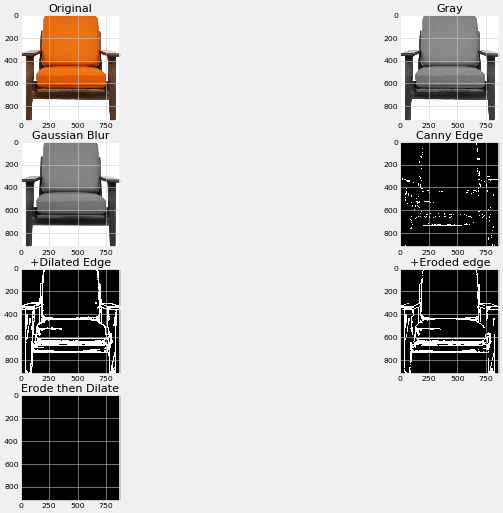

In [7]:
img_path = 'furniture.png'

# 1. Read image 
img = cv2.imread( img_path )

# 2. convert to gray scale 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. convert btwn RGB and BGR format
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) 

# 4. blur image
gaussian_blur = cv2.GaussianBlur(img_gray, (7,7), 0) ## kernel (7,7)


# 5. Canny edge detector
canny_edge = cv2.Canny( img, 80, 10) # 100, 100 threshold values

# 6. dilation - improve edge detection by fill in gaps in edges by increasing thickness of edges 
kern = np.ones( (5,5), np.uint8)
dilated_edge = cv2.dilate( canny_edge, kern, iterations=2) #kernel, # iterations affect size of thickness

# 7. erosion - make edges thinner; sorter smooths out
eroded_edge = cv2.erode(dilated_edge, kern, iterations=1)

# 8. Check erode first and then dilate <<< makes sense to dilate first else things disappear instead of getting enhanced
erode_then_dilate = cv2.dilate( cv2.erode(canny_edge, kern, iterations=1), kern, iterations=10) 

grid_plot_images([img, img_gray, gaussian_blur, 
                   canny_edge, dilated_edge, eroded_edge,
                   erode_then_dilate],
                 
                 titlz=['Original', 'Gray', "Gaussian Blur", 
                       'Canny Edge', '+Dilated Edge', '+Eroded edge',
                       'Erode then Dilate'], 
                 logit=False)

## 3. Resizing & Cropping Images
- Image origin is at top left corner 
- 


------- Original -------
image.shape = (928, 871, 3)
datatype = uint8
min = 0 , max = 255


------- Resize down/small -------
image.shape = (200, 300, 3)
datatype = uint8
min = 0 , max = 255


------- Resize up/enlarge -------
image.shape = (2000, 3000, 3)
datatype = uint8
min = 0 , max = 255


------- Cropped -------
image.shape = (800, 300, 3)
datatype = uint8
min = 0 , max = 255


------- Single channel only -------
image.shape = (928, 871)
datatype = uint8
min = 0 , max = 255



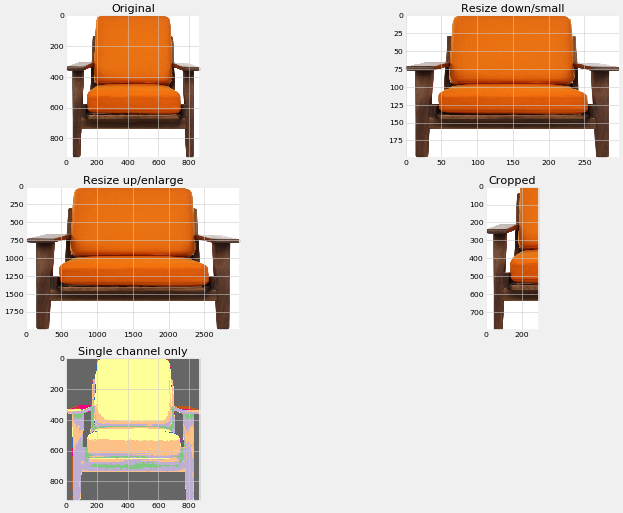

In [28]:
# xtics of the image
# 1. resized << note indexing is height and then width 
imagez = [
    img, 
    cv2.resize( img, (300, 200)),   # aspect ratio not maintained
    cv2.resize( img, (3000, 2000)), # aspect ratio not maintained
    img[ 100:900, 0:300, :],          # crop using ndarray slicing
    img[ :, :, 1]         # B G R = 0,1,2:  channel only
]

titlez = [
    'Original',
    'Resize down/small',
    'Resize up/enlarge', 
    'Cropped',
    'Single channel only'
]

## xtics of images, logit=False
## plots of images
grid_plot_images( imagez, titlez, cmapd='Accent')

## 4. Shapes and Text
- Drawing shapes and text on images

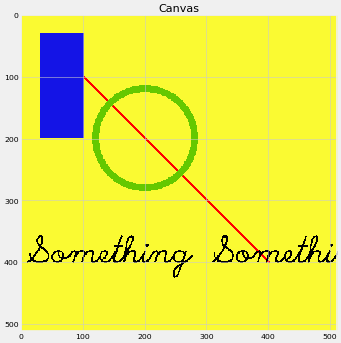

In [51]:
## 1. def blank canvas
canvas = np.zeros( (512, 512, 3) , np.uint8)

## 2. add color
canvas[:] = 250, 250, 50 ## R G B else B G R on cv2
#canvas[0,0,:]

## 3. Add line to canvas 
cv2.line( canvas, (100,100), (400,400), (255,0,0), 3)

## 4. add rectangle
cv2.rectangle( canvas, (30,30), (100, 200), (20,20,230), cv2.FILLED)

## 5. add circle 
cv2.circle( canvas, (200, 200), 80, (100, 200, 0), 10) #cv2.FILLED

## 6. put text 
cv2.putText(canvas, 'Something Something', (10, 400), 
            cv2.FONT_HERSHEY_SCRIPT_SIMPLEX|cv2.FONT_ITALIC, 
            2, (0,0,0), 2) #scale, color, thickness

imagez = [
    canvas, 
]

titlez = [
    'Canvas', 
]

## plots of images
grid_plot_images( imagez, titlez, logit=False);  #, cmapd='Accent')

## 5. Warp Perspective
- E.G. to get birds eye view 



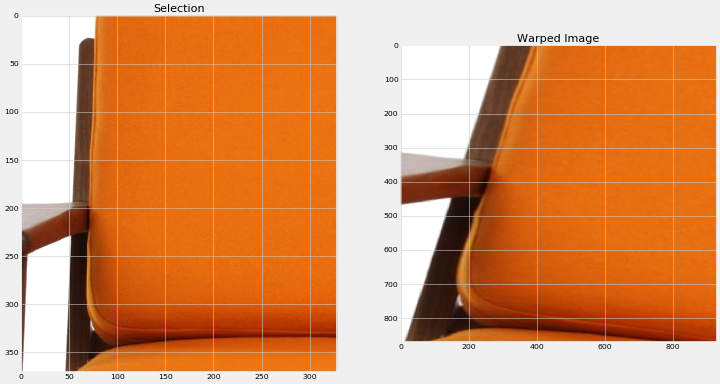

In [56]:
## Define the corners for the birds eye view perspective 
W, H = img.shape[:2] #250, 350
pts = np.float32([
    [111, 219],
    [287, 188],
    [154, 482],
    [352, 440]
])

pts_map = np.float32([
    [0, 0],
    [W, 0],
    [0, H],
    [W, H]
])

matrix = cv2.getPerspectiveTransform(pts, pts_map)
img_out = cv2.warpPerspective(img, matrix, (W,H) )

imagez = [
    img[111:482, 111:440, :],
    img_out, 
    
]

titlez = [
    'Selection', 
    'Warped Image', 
]

## plots of images
grid_plot_images( imagez, titlez, logit=False);  #, cmapd='Accent')

## 6. Joining Images
- `np.hstak` expects same dimension and number of channels. Resulting image will be n factors of the one image; cannot size as you stack and can go out of frame. So extra steps to resize etc  

- 

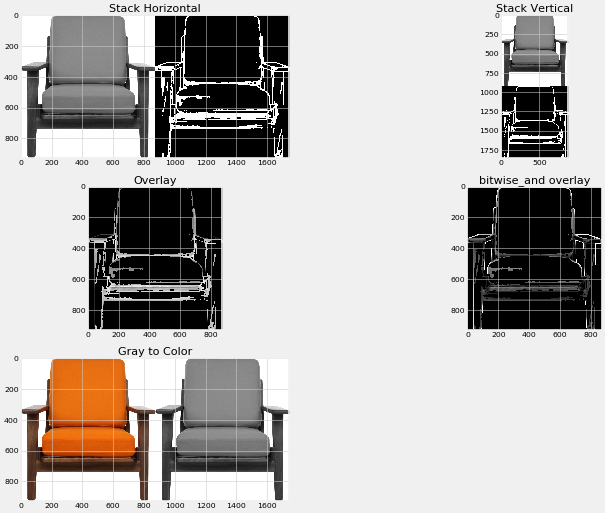

In [84]:

imagez = [
    np.hstack( (img_gray, eroded_edge) ),
    np.vstack( (img_gray, eroded_edge)),
    img_gray * eroded_edge,
    cv2.bitwise_and(img_gray, eroded_edge),
    np.hstack( (img, cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR) )),    
    
]

titlez = [
    'Stack Horizontal',      #Join stacked 
    'Stack Vertical',      #Join stacked 
    'Overlay',   #Join overlay
    'bitwise_and overlay', 
    'Gray to Color'
]

## plots of images
grid_plot_images( imagez, titlez, logit=False);  #, cmapd='Accent')

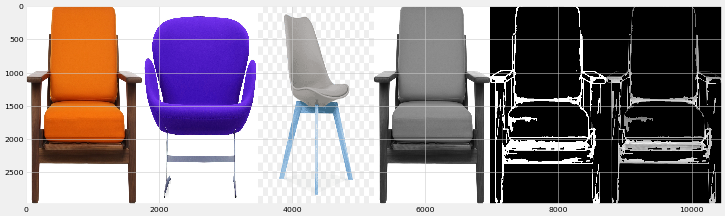

In [76]:
## define own method to resize and deal different channels and sizes
# E.G. below but is not handling aspect ratio, align multi-channel, multi row << is rough showcase
def stack_images( imagez, rescale=1, ncolz=None ):
    w = np.max([x.shape[0] for x in imagez])
    h = np.max([x.shape[1] for x in imagez])     
    stacks =  []
    for img in imagez:
        stacks.append( cv2.resize(img, (w, h) )) # cv2.cvtColor( cv2.resize(img, (w, h) ), cv2.COLOR_GRAY2BGR )
        
        
    plt.imshow( np.hstack(stacks ) )
    
    
stack_images([img, cv2.imread('furniture2.png'), cv2.imread('furniture3.png'),
              cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR),  
              cv2.cvtColor( eroded_edge, cv2.COLOR_GRAY2BGR ),
             cv2.cvtColor(img_gray * eroded_edge,cv2.COLOR_GRAY2BGR )])

## 7. Color Detection
- First convert to HSV space b/c
- Then defin color range values including hues and limits of interest 
    - Can use track bars to interactively determine optimum min/max values of the target color. Use `cv2.createTrackbar`, `cv2.getTrackbarPos` and `cv2.inRange` 
    
     - This will create a mask for the desired color 
- Then use `cvt.bitwise_and` to add two images and create a new image  

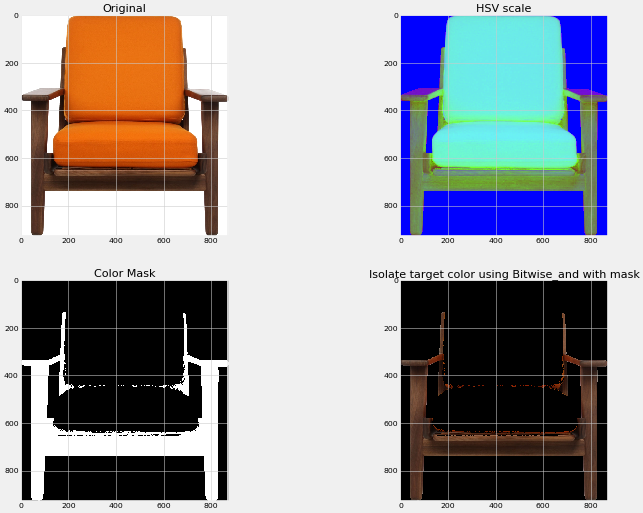

In [99]:
## Detect orange or brown color in image
# hardcoding here else should use cv2.crateTrackbar or such to seek 
hue_min, hue_max = 10, 150
sat_min, sat_max = 30, 250
val_min, val_max = 0, 150

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )

lower = np.array( [hue_min, sat_min, val_min ])
upper = np.array( [hue_max, sat_max, val_max ])

mask = cv2.inRange( img_hsv, lower, upper) ## the desired color is white and all else black

## invert mask
# print(mask.shape)
# print(mask[0])
#mask = mask -1 
#mask = -1*mask
# print(mask.shape)
# print(mask[0])

img_out = cv2.bitwise_and(img, img, mask=mask)

imagez = [
    img,
    img_hsv,
    mask, 
    img_out,
]

titlez = [
    'Original',
    'HSV scale',
    'Color Mask',
    'Isolate target color using Bitwise_and with mask'
]

grid_plot_images( imagez, titlez, logit=False);  #, cmapd='Accent')

## 8. Contour/Shape Detection
- Detect the corner points and use that to determine shape 

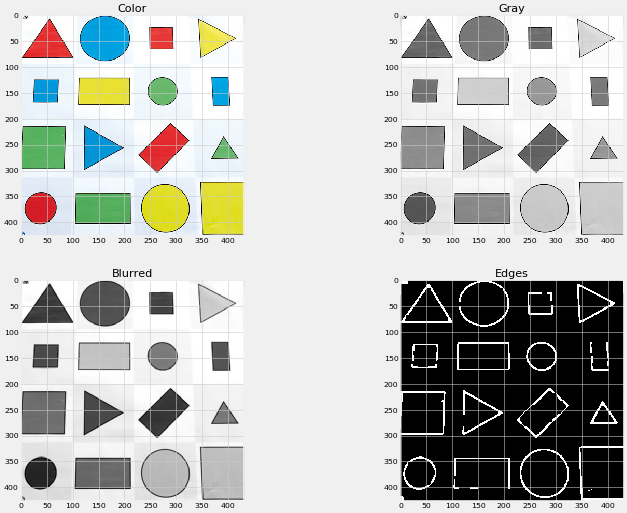

In [217]:
# ip = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSCiR5GL_VfLypipe_WvK0g3I-0WrxzstBjL5hfZVgCd53axcAC&usqp=CAU"
ip = "https://lh3.googleusercontent.com/proxy/k3V64hM-jUPMm4m-nznaLTyb5-Jq2lYTNNMy5S7mITbQvszVSoRzt5e5Q8r9g0gQtox3OvC2UdToiTzRctbiGeSWHhsRmfGwhTVS2VweVMDRLIsjwLYYPdxGvPwWNg"
simg, simg_gray = fetch_image(ip)

## crop out junk
simg = simg[ 45:-40, 40:-40, :]
simg_gray = cv2.cvtColor( simg, cv2.COLOR_RGB2GRAY )

prep_img = cv2.GaussianBlur(simg_gray, (3,3), 1)

simg_edgez = cv2.Canny(prep_img, 50, 50)

kern = np.ones((5,5))
simg_edgez = cv2.erode( cv2.dilate(simg_edgez, kern, iterations=1), kern, iterations=1)

grid_plot_images( 
    [simg, simg_gray, prep_img, simg_edgez], 
    ['Color', 'Gray', 'Blurred', 'Edges'],
    logit=False)

In [218]:
# canvas = np.zeros_like( simg )

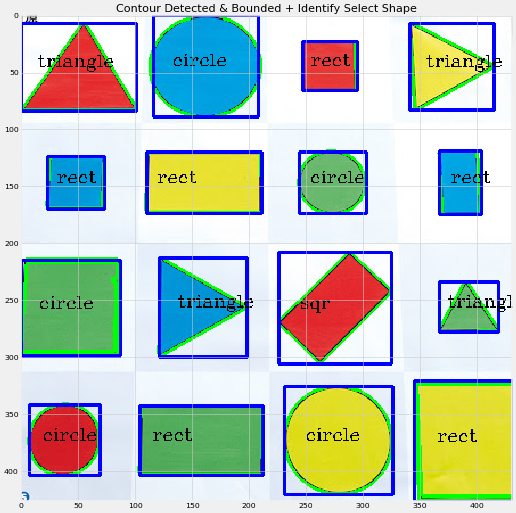

In [220]:
## get contours 

img_contourz = simg.copy()

def get_contours(cimg, canvas): #, outimg=img_detected_shape):
    countourz, hierarchyz = cv2.findContours(cimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) ## cv2.RETR_EXTERNAL = retrieve extreme outer contours 
    
    for c in countourz:
        ##find area, then draw it
        area = cv2.contourArea(c)
        #print(area)
        
        ##work with minimum area threshold to filter out noise
        if area >= 500:
            cv2.drawContours( canvas, c, -1, (0,255,0), 2 )
            
            #calc arc length or contour perimeter to identify corners
            peri = cv2.arcLength(c, True) ### True b/c closed shape
            # approx number of contours
            n_contz = cv2.approxPolyDP(c, 0.03*peri, True) ## True b/c closed shape
            n_cornerz = len(n_contz) 
#             print(f"# Corners = {n_cornerz}")
            
            #gen a bounding box <, can be used @ center, total width, etc of an object 
            x, y, w, h = cv2.boundingRect( n_contz )
            
            ## now categorize:
            txt_label = ''
            
            if n_cornerz >=3 and n_cornerz <= 3:
                txt_label = 'triangle'
            elif n_cornerz >= 4 and n_cornerz <= 6:
                ar = w/h
                if ar >= 0.97 and ar <= 1.03:
                    txt_label = 'sqr'
                else:
                    txt_label = 'rect'
            elif n_cornerz > 6:
                txt_label = 'circle'
            else:
                txt_label = 'unknown'
            
            cv2.rectangle(canvas, (x,y), (x+w, y+h), (0,0,255), 2)
            cv2.putText( canvas, txt_label,
                       (x+(h//5)-1, y+(h//2)) , ## center of objct
                       cv2.FONT_HERSHEY_COMPLEX, 0.5, (3,3,3))
        


get_contours(simg_edgez,  img_contourz)

plot_image( img_contourz , title='Contour Detected & Bounded + Identify Select Shape', logit=False)


## 9. Face Detection
**Viola And Jones Method**
- One of the earliest methods that allowed real time object detection  
